# IMPORT DE DONNEES

In [2]:
#VISUALISATION ET IMPORT DE DONNEES
import os
import pickle
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns



#SKLEARN FUNCTIONS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import joblib


########################      PRE-PROCESSING      #############################


#ouverture et lecture des deux fichiers csv : frequences propres et entrées 
freq = pd.read_csv(open("testPOC.csv", "r"),
                    delimiter=",")
inputs = pd.read_csv(open("dictPOC.csv", "r"),
                    delimiter=",")
#2 dataFrames sont créés

#keep 1 column of freq


#Concatenation des deux dataframes dans le même DataFrame : data
datas = [inputs, freq]
datas = pd.concat(datas, axis=1)


def plot_correlation_matrix(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()
    print(corr)

# plot_correlation_matrix(pd.DataFrame(datas))

# d'apres la matrice de correlation, certaines entrées sont étroitement liées
# on va donc supprimer certaines de ces valeurs pour conserver :
# hauteur h, base b, la masse volumique rho, la longueur de la poutre L_tot
to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
datas = datas.drop(columns=to_drop)
#keep 10000 random values of datas


print(datas)
######################      FIN PRE-PROCESSING      ###########################




#######################      TRAIN_TEST_SPLIT      ############################
# 70% de la population sera allouée à l'apprentissage, 30 % pour le test
population_train = 0.7

# mélange et séparation de nos données en 2 datasets  
split_train, split_test = train_test_split(datas, train_size=population_train)

# On extrait les données qui serviront d'objectif à atteindre, soit ici les 
# 8 fréquences propres à prédire

entrees = ['L_tot','rho', 'h', 'b']
split_target_train = split_train.drop(columns=entrees)
split_target_test = split_test.drop(columns=entrees)


frequences = ["freq1"]
split_train = split_train.drop(columns=frequences)
split_test = split_test.drop(columns=frequences)

print("entrées train : \n",split_train)
print("target train : \n", split_target_train)

#split_train = entrees servant à entrainer le modèle
#split test = entrees servant à tester le modèle
#split_target_train = sorties d'entrainement du modèle
#split_target_test = sorties de test du modèle 


#######################      FIN TR_TST_SPLIT      ############################

         L_tot   rho         h         b       freq1
0     0.288160  2700  0.005500  0.009846   54.090599
1     0.172119  2400  0.008618  0.010560  166.140594
2     0.677284  2400  0.042307  0.044046   52.675499
3     0.957810  4510  0.080897  0.078160   71.617699
4     0.530750  2700  0.006690  0.006449   19.395201
...        ...   ...       ...       ...         ...
9995  0.946155  7800  0.050133  0.062122   46.150902
9996  0.333653  7850  0.018539  0.028223  139.140503
9997  0.204040  7850  0.004373  0.011738   87.760803
9998  0.289012  7800  0.017508  0.012411  172.734207
9999  0.698311  4510  0.056114  0.056225   93.457802

[10000 rows x 5 columns]
entrées train : 
          L_tot   rho         h         b
6568  0.546502  2500  0.046348  0.046046
1443  0.237063  4510  0.002978  0.019140
3023  0.276844  7850  0.016864  0.024267
2045  0.500056  7800  0.040457  0.009192
8555  0.432257  2700  0.006187  0.039933
...        ...   ...       ...       ...
2770  0.209354  2500  0.004174  0

# PROCESSING

In [10]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [19]:
"""my_grid_poly ={'polynomialfeatures__degree': [9],
                'linearregression__fit_intercept': [True, False],
                'linearregression__normalize': [True, False]}


poly_reg_model = PolynomialRegression(9, fit_intercept=True, normalize=True)
grid_search = GridSearchCV(poly_reg_model, my_grid_poly, cv=5, n_jobs=-1, verbose=2,)
#print best score and model
# Ravel plit_target_train
jesuisunfdp = grid_search.fit(split_train, split_target_train)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)"""

"my_grid_poly ={'polynomialfeatures__degree': [9],\n                'linearregression__fit_intercept': [True, False],\n                'linearregression__normalize': [True, False]}\n\n\npoly_reg_model = PolynomialRegression(9, fit_intercept=True, normalize=True)\ngrid_search = GridSearchCV(poly_reg_model, my_grid_poly, cv=5, n_jobs=-1, verbose=2,)\n#print best score and model\n# Ravel plit_target_train\njesuisunfdp = grid_search.fit(split_train, split_target_train)\nprint(grid_search.best_score_)\nprint(grid_search.best_estimator_)\nprint(grid_search.best_params_)"

In [20]:
poly_reg_model = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_model.fit(split_train, split_target_train)
print("",poly_reg_model.score(split_test, split_target_test))

c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


 0.9987093707678558


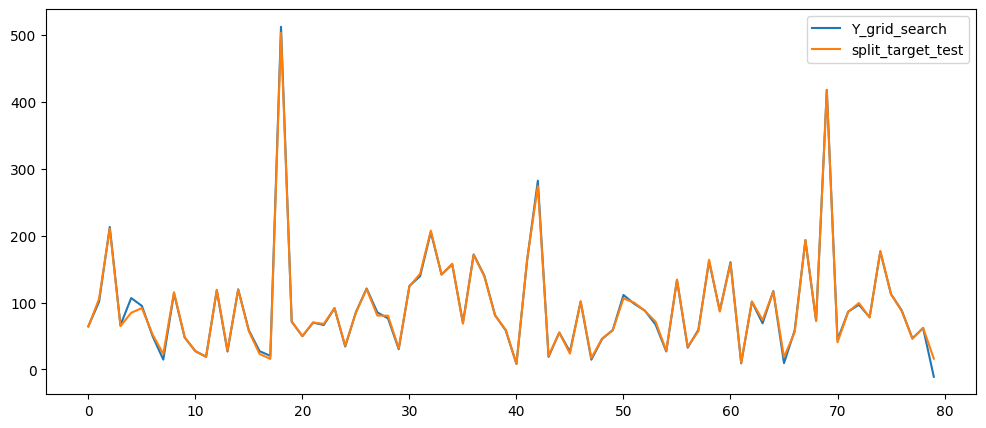

In [21]:
Y_pred = poly_reg_model.predict(split_test)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred)[:80])
plt.plot((np.array(split_target_test)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()


In [9]:
from sklearn.pipeline import Pipeline


polynomial_features = PolynomialFeatures(degree=9)
linear_regression = LinearRegression(fit_intercept=True, normalize=True)
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(split_train, split_target_train)
print("",pipeline.score(split_test, split_target_test))

c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


 0.9988864947030847


In [23]:
poly_reg_model = PolynomialRegression(2 , fit_intercept=True, normalize=True)
poly_reg_model.fit(split_train, split_target_train)
print("",poly_reg_model.score(split_test, split_target_test))

 0.7417906607723165


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


# PASSAGE A L'EVALUATION DU MODELE EN FONCTION DU NOMBRE DE DONNEES

In [24]:
freq = pd.read_csv(open("test10el.csv", "r"),
                    delimiter=",")
inputs = pd.read_csv(open("dict10el.csv", "r"),
                    delimiter=",")
#2 dataFrames sont créés

#keep 1 column of freq


#Concatenation des deux dataframes dans le même DataFrame : data
datas = [inputs, freq]
datas = pd.concat(datas, axis=1)


def plot_correlation_matrix(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()
    print(corr)

# plot_correlation_matrix(pd.DataFrame(datas))

# d'apres la matrice de correlation, certaines entrées sont étroitement liées
# on va donc supprimer certaines de ces valeurs pour conserver :
# hauteur h, base b, la masse volumique rho, la longueur de la poutre L_tot
to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
datas = datas.drop(columns=to_drop)
#keep 10000 random values of datas


print(datas)
######################      FIN PRE-PROCESSING      ###########################


          L_tot   rho         h         b       freq1
0      0.107854  2700  0.010595  0.004782  743.825989
1      0.963487  7850  0.022054  0.059100   19.849300
2      0.855746  7850  0.079650  0.048035   90.876297
3      0.657111  4510  0.008149  0.024741   15.327500
4      0.108837  2500  0.007384  0.003889  529.052307
...         ...   ...       ...       ...         ...
99995  0.425659  2400  0.019574  0.008568   61.702099
99996  0.889934  8900  0.066700  0.079108   50.781300
99997  0.180274  2700  0.014730  0.007937  370.140991
99998  0.431294  2500  0.031679  0.022028  144.532394
99999  0.793565  2400  0.037652  0.060480   34.147800

[100000 rows x 5 columns]


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

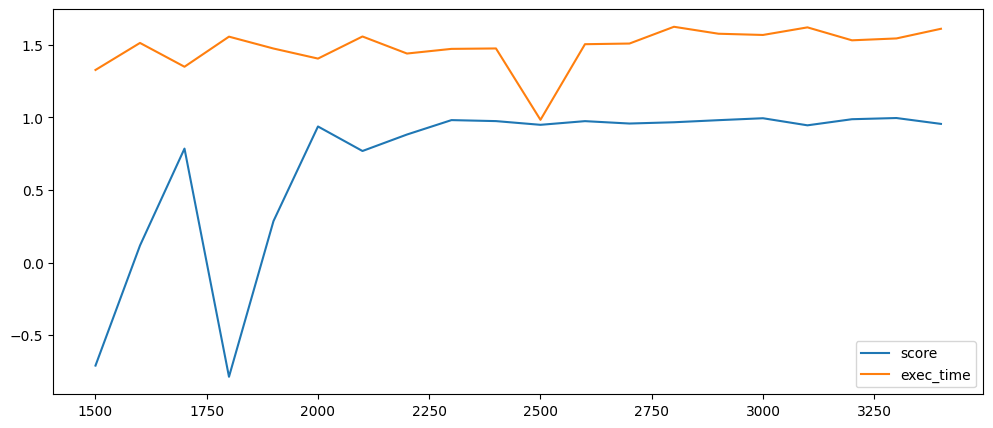

[-0.7096607315317163, 0.11733185021556924, 0.7849109764595729, -0.7866891596333565, 0.28562192263788355, 0.9373695624959096, 0.7684364578286046, 0.8819327735461999, 0.9812129884620951, 0.9743362858954936, 0.9487762461375265, 0.9740576178353579, 0.9576382214058159, 0.9663844265816341, 0.9807731955430997, 0.9941037167130998, 0.9452956980436898, 0.987367957152491, 0.9955352040583509, 0.9551209260294214]
[1.326669692993164, 1.512801170349121, 1.3487811088562012, 1.5560736656188965, 1.4742584228515625, 1.4049510955810547, 1.557126760482788, 1.4397778511047363, 1.471862554550171, 1.4747776985168457, 0.983104944229126, 1.5040385723114014, 1.5085821151733398, 1.6240525245666504, 1.576169729232788, 1.56768798828125, 1.6199605464935303, 1.5308289527893066, 1.5437545776367188, 1.6102826595306396]
[1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400]


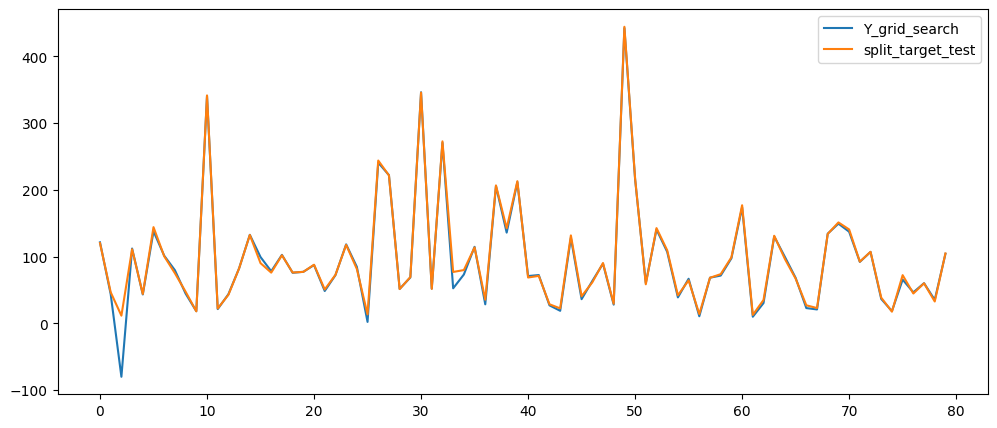

In [25]:
# keep 10000 random values of datas
import time


score = []
nbr_values = []
exec_time = []

for i in range(1500,3500,100):

    new_datas = datas.sample(i)
    #######################      TRAIN_TEST_SPLIT      ############################
    # 70% de la population sera allouée à l'apprentissage, 30 % pour le test
    population_train = 0.7

    # mélange et séparation de nos données en 2 datasets  
    split_train, split_test = train_test_split(new_datas, train_size=population_train)

    # On extrait les données qui serviront d'objectif à atteindre, soit ici les 
    # 8 fréquences propres à prédire

    entrees = ['L_tot','rho', 'h', 'b']
    split_target_train = split_train.drop(columns=entrees)
    split_target_test = split_test.drop(columns=entrees)


    frequences = ["freq1"]
    split_train = split_train.drop(columns=frequences)
    split_test = split_test.drop(columns=frequences)
    start = time.time()
    poly_reg_model = PolynomialRegression(9 , fit_intercept=True, normalize=True)
    poly_reg_model.fit(split_train, split_target_train)
    end = (time.time() - start)
    score.append(poly_reg_model.score(split_test, split_target_test))
    nbr_values.append(i)
    exec_time.append(time.time() - start)

plt.figure(figsize=(12, 5))
plt.plot(nbr_values, score)
plt.plot(nbr_values, exec_time)
plt.legend(
    ['score', 'exec_time'])
plt.show()

print(score)
print(exec_time)
print(nbr_values)

Y_pred = poly_reg_model.predict(split_test)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred)[:80])
plt.plot((np.array(split_target_test)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

# show best ratio score / exec_time





    





## Entrainement 100 elements finnis


In [26]:
freq = pd.read_csv(open("test100.csv", "r"),
                    delimiter=",")
inputs = pd.read_csv(open("dict100.csv", "r"),
                    delimiter=",")

# delete last column of inputs
#2 dataFrames sont créés

#keep 1 column of freq


#Concatenation des deux dataframes dans le même DataFrame : data
datas = [inputs, freq]
datas = pd.concat(datas, axis=1)


def plot_correlation_matrix(data):
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
    plt.show()
    print(corr)

# plot_correlation_matrix(pd.DataFrame(datas))

# d'apres la matrice de correlation, certaines entrées sont étroitement liées
# on va donc supprimer certaines de ces valeurs pour conserver :
# hauteur h, base b, la masse volumique rho, la longueur de la poutre L_tot
to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat']
datas = datas.drop(columns=to_drop)
#keep 10000 random values of datas


print(datas)
######################      FIN PRE-PROCESSING      ###########################

         L_tot   rho         h         b       freq1
0     0.384477  4510  0.028018  0.026937  153.938705
1     0.749060  8900  0.014586  0.069854   15.674900
2     0.816123  4510  0.073874  0.050625   90.078903
3     0.110065  8900  0.006346  0.005231  315.841492
4     0.717205  7850  0.030788  0.011665   50.009701
...        ...   ...       ...       ...         ...
4995  0.474135  2400  0.036221  0.014529   92.021400
4996  0.348351  7800  0.030695  0.027379  208.453201
4997  0.845470  2400  0.047405  0.025971   37.876301
4998  0.479964  2400  0.024620  0.029600   61.039902
4999  0.210392  8900  0.013121  0.020436  178.736496

[5000 rows x 5 columns]


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

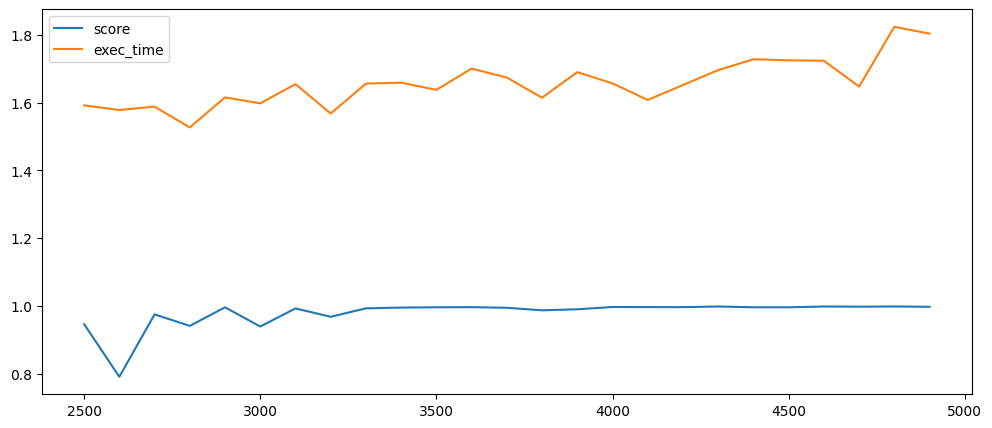

[0.9462295445343275, 0.7910398878716505, 0.9751354178643207, 0.9412396362540045, 0.9960009374270427, 0.9392877221380277, 0.9927842131828011, 0.9680838596295771, 0.9929549775517259, 0.9952586350747676, 0.9960731725811752, 0.9964846318407778, 0.9946296894470462, 0.9871438346180444, 0.9902340776432321, 0.9969608855250522, 0.996581360071693, 0.9965308552489007, 0.9984411646532052, 0.9960800423039382, 0.9960637557093225, 0.9984486948824569, 0.9978945694184149, 0.9984886617080685, 0.9974844257255836]
[1.5919606685638428, 1.578362226486206, 1.5882012844085693, 1.5268669128417969, 1.615567922592163, 1.5979177951812744, 1.6546013355255127, 1.5679965019226074, 1.6561400890350342, 1.6588845252990723, 1.6376979351043701, 1.7005043029785156, 1.6740679740905762, 1.6147243976593018, 1.6900980472564697, 1.6568400859832764, 1.6079981327056885, 1.6520538330078125, 1.6960723400115967, 1.728020191192627, 1.7249159812927246, 1.7236173152923584, 1.6474101543426514, 1.8238911628723145, 1.803635597229004]
[25

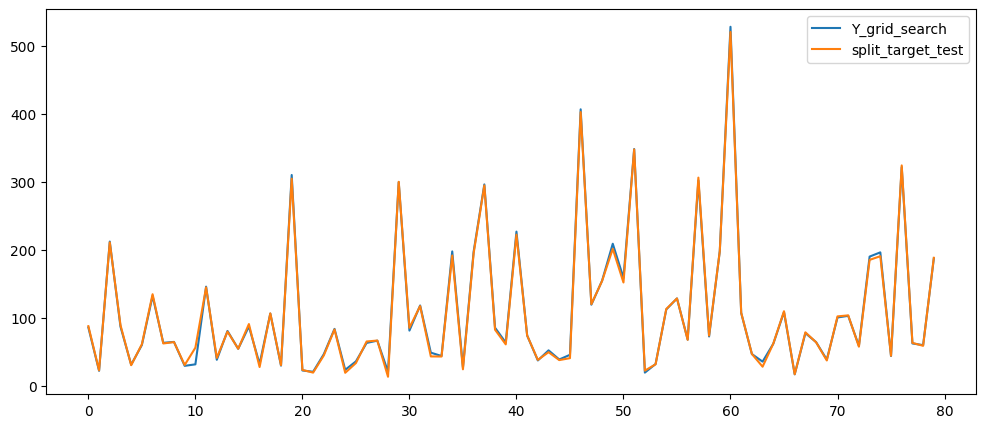

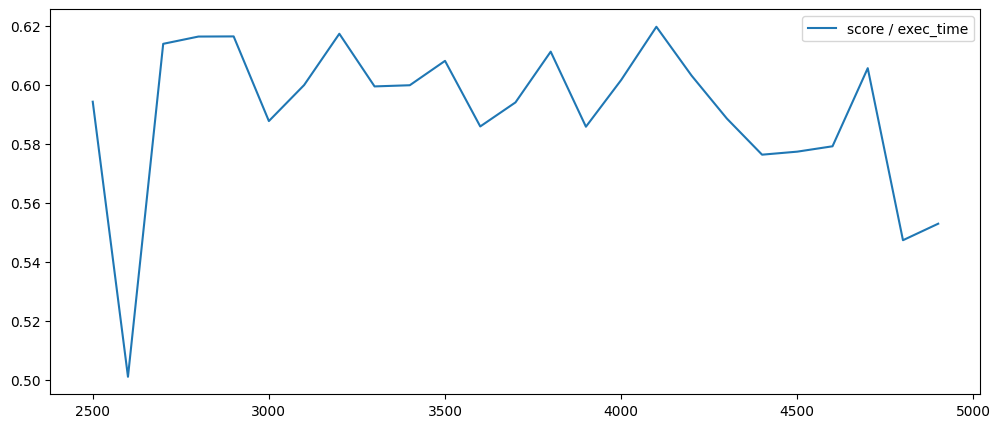

In [27]:
import time


score = []
nbr_values = []
exec_time = []

for i in range(2500,5000,100):

    new_datas = datas.sample(i)
    #######################      TRAIN_TEST_SPLIT      ############################
    # 70% de la population sera allouée à l'apprentissage, 30 % pour le test
    population_train = 0.7

    # mélange et séparation de nos données en 2 datasets  
    split_train, split_test = train_test_split(new_datas, train_size=population_train)

    # On extrait les données qui serviront d'objectif à atteindre, soit ici les 
    # 8 fréquences propres à prédire

    entrees = ['L_tot','rho', 'h', 'b']
    split_target_train = split_train.drop(columns=entrees)
    split_target_test = split_test.drop(columns=entrees)


    frequences = ["freq1"]
    split_train = split_train.drop(columns=frequences)
    split_test = split_test.drop(columns=frequences)
    start = time.time()
    poly_reg_model = PolynomialRegression(9 , fit_intercept=True, normalize=True)
    poly_reg_model.fit(split_train, split_target_train)
    end = (time.time() - start)
    score.append(poly_reg_model.score(split_test, split_target_test))
    nbr_values.append(i)
    exec_time.append(time.time() - start)

plt.figure(figsize=(12, 5))
plt.plot(nbr_values, score)
plt.plot(nbr_values, exec_time)
plt.legend(
    ['score', 'exec_time'])
plt.show()

print(score)
print(exec_time)
print(nbr_values)

Y_pred = poly_reg_model.predict(split_test)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred)[:80])
plt.plot((np.array(split_target_test)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

for i in range(0, len(score)):
    score[i] = score[i] / exec_time[i]
  

plt.figure(figsize=(12, 5))
plt.plot(nbr_values, score)
plt.legend(
    ['score / exec_time'])
plt.show()






# Entrainement des modèles pour les autres formes de poutres


## Load et gestion des données

In [4]:
freq_cercle = pd.read_csv(open("gen_data/test_Cercle.csv", "r"),delimiter=",")
input_cercle = pd.read_csv(open("gen_data/dict_Cercle.csv", "r"),delimiter=",")

freq_cercle_creux = pd.read_csv(open("gen_data/test_Cercle_Creux.csv", "r"),delimiter=",")
input_cercle_creux = pd.read_csv(open("gen_data/dict_Cercle_Creux.csv", "r"),delimiter=",")

freq_rectangle_creux = pd.read_csv(open("gen_data/test_Rectangle_Creux.csv", "r"),delimiter=",")
input_rectangle_creux = pd.read_csv(open("gen_data/dict_Rectangle_Creux.csv", "r"),delimiter=",")

freq_rectangle = pd.read_csv(open("test10el.csv", "r"),delimiter=",")
input_rectangle = pd.read_csv(open("dict10el.csv", "r"),delimiter=",")

freq_rectangle100el = pd.read_csv(open("test100.csv", "r"),delimiter=",")
input_rectangle100el = pd.read_csv(open("dict100.csv", "r"),delimiter=",")

data_cercle = [input_cercle, freq_cercle]
data_cercle = pd.concat(data_cercle, axis=1)

data_cercle_creux = [input_cercle_creux, freq_cercle_creux]
data_cercle_creux = pd.concat(data_cercle_creux, axis=1)

data_rectangle_creux = [input_rectangle_creux, freq_rectangle_creux]
data_rectangle_creux = pd.concat(data_rectangle_creux, axis=1)

data_rectangle = [input_rectangle, freq_rectangle]
data_rectangle = pd.concat(data_rectangle, axis=1)



to_drop = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat']
to_drop_sans_mat = ['NbElts', 'S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
freq1 = frequences

data_cercle = data_cercle.drop(columns=to_drop)
data_cercle_creux = data_cercle_creux.drop(columns=to_drop)
data_rectangle_creux = data_rectangle_creux.drop(columns=to_drop)
data_rectangle = data_rectangle.drop(columns=to_drop_sans_mat)


split_train_cercle,split_test_cercle = train_test_split(data_cercle, train_size=population_train)
entrees_cercle = ['L_tot','rho', 'r']
split_target_train_cercle = split_train_cercle.drop(columns=entrees_cercle)
split_target_test_cercle = split_test_cercle.drop(columns=entrees_cercle)
split_train_cercle.head(10)
split_train_cercle = split_train_cercle.drop(columns=freq1)
split_test_cercle = split_test_cercle.drop(columns=freq1)
print(split_train_cercle)



split_train_cercle_creux,split_test_cercle_creux = train_test_split(data_cercle_creux, train_size=population_train)
entrees_cercle_creux = ['L_tot','rho', 'r_ext','r_int']
split_target_train_cercle_creux = split_train_cercle_creux.drop(columns=entrees_cercle_creux)
split_target_test_cercle_creux = split_test_cercle_creux.drop(columns=entrees_cercle_creux)
split_train_cercle_creux = split_train_cercle_creux.drop(columns=freq1)
split_test_cercle_creux = split_test_cercle_creux.drop(columns=freq1)


entrees_rectangle_creux = ['L_tot','rho', 'h_ext','b_ext','h_int','b_int']
split_train_rectangle_creux,split_test_rectangle_creux = train_test_split(data_rectangle_creux, train_size=population_train)
split_target_train_rectangle_creux = split_train_rectangle_creux.drop(columns=entrees_rectangle_creux)
split_target_test_rectangle_creux = split_test_rectangle_creux.drop(columns=entrees_rectangle_creux)
split_train_rectangle_creux = split_train_rectangle_creux.drop(columns=freq1)
split_test_rectangle_creux = split_test_rectangle_creux.drop(columns=freq1)


entrees_rectangle = ['L_tot','rho', 'h','b']
split_train_rectangle,split_test_rectangle = train_test_split(data_rectangle, train_size=population_train)
split_target_train_rectangle = split_train_rectangle.drop(columns=entrees_rectangle)
split_target_test_rectangle = split_test_rectangle.drop(columns=entrees_rectangle)
split_train_rectangle = split_train_rectangle.drop(columns=freq1)
split_test_rectangle = split_test_rectangle.drop(columns=freq1)


         L_tot   rho         r
112   0.157448  2400  0.001986
2342  0.182229  4510  0.008543
2323  0.532509  4510  0.045310
995   0.876166  7800  0.051736
1779  0.699322  2500  0.031599
...        ...   ...       ...
610   0.750859  2700  0.051502
1452  0.633927  8900  0.061957
2453  0.565911  4510  0.019422
1983  0.674245  4510  0.050506
916   0.815300  2400  0.032555

[1750 rows x 3 columns]


## Entrainement des modèles

In [10]:
for i in range(10,16):
    poly_reg_rectangle_creux = PolynomialRegression(i, fit_intercept=True, normalize=True)
    poly_reg_rectangle_creux.fit(split_train_rectangle_creux, split_target_train_rectangle_creux)
    print(i,poly_reg_rectangle_creux.score(split_test_rectangle_creux, split_target_test_rectangle_creux))
    


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


10 -122566172.41497158


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [5]:
poly_reg_cercle = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_cercle.fit(split_train_cercle, split_target_train_cercle)
poly_reg_cercle_creux = PolynomialRegression(6, fit_intercept=True, normalize=True)
poly_reg_cercle_creux.fit(split_train_cercle_creux, split_target_train_cercle_creux)
poly_reg_rectangle_creux = PolynomialRegression(6, fit_intercept=True, normalize=True)
poly_reg_rectangle_creux.fit(split_train_rectangle_creux, split_target_train_rectangle_creux)
poly_reg_rectangle = PolynomialRegression(9, fit_intercept=True, normalize=True)
poly_reg_rectangle.fit(split_train_rectangle, split_target_train_rectangle)

Y_pred_cercle = poly_reg_cercle.predict(split_test_cercle)
Y_pred_cercle_creux = poly_reg_cercle_creux.predict(split_test_cercle_creux)
Y_pred_rectangle_creux = poly_reg_rectangle_creux.predict(split_test_rectangle_creux)
Y_pred_rectangle = poly_reg_rectangle.predict(split_test_rectangle)

# print score for each modèle
print("Cercle : ",poly_reg_cercle.score(split_test_cercle, split_target_test_cercle))
print("Cercle creux",poly_reg_cercle_creux.score(split_test_cercle_creux, split_target_test_cercle_creux))
print("Rectangle creuc",poly_reg_rectangle_creux.score(split_test_rectangle_creux, split_target_test_rectangle_creux))
print("Rectangle",poly_reg_rectangle.score(split_test_rectangle, split_target_test_rectangle))



c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

Cercle :  0.9947293588495838
Cercle creux 0.9834859212434447
Rectangle creuc 0.9819253729903148
Rectangle 0.9991093060500346


In [6]:
split_train_rectangle.head(10)

,L_tot,rho,h,b
68692,0.435687,4510,0.019980,0.031243
30353,0.716808,2700,0.015933,0.059033
83060,0.747944,2700,0.044350,0.019712
5807,0.422356,2500,0.028964,0.040489
52045,0.932230,2400,0.025416,0.030834
41884,0.850686,2400,0.026278,0.028548
32775,0.589060,7850,0.037538,0.048136
47258,0.429039,7800,0.012453,0.032701
41457,0.761052,4510,0.055239,0.039779
11165,0.255773,8900,0.006552,0.017969


In [8]:
# grid search for cercle_creux

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

my_grid_poly ={'polynomialfeatures__degree': [2],
                'linearregression__fit_intercept': [True],
                'linearregression__normalize': [True]}
grid = GridSearchCV(PolynomialRegression(), my_grid_poly, cv=2,verbose=10,n_jobs=-1)
grid.fit(split_train_rectangle_creux, split_target_train_rectangle_creux)
print(grid.best_params_)
print(grid.best_score_)

#best for rectangle creux : {'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 4}
# score : 0.91 
# best param degré = 6 true true for 0.97 best score 

"""my_grid_rf ={'n_estimators': [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,200,300,400,500],
                'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                'min_samples_split':[2],
                'min_samples_leaf':[1],
                'max_features':['auto'],
                'bootstrap':[True]}

#{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
#0.9472339926463627
# cercle creux 

{'bootstrap': True, 'max_depth': 13, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9580550198774036
rectanlge creux
                
grid = GridSearchCV(RandomForestRegressor(), my_grid_rf, cv=3,verbose=1,n_jobs=-1)
grid.fit(split_test_rectangle_creux, split_target_test_rectangle_creux)"""
print(grid.best_params_)
print(grid.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
{'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
0.7538954542804697
{'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
0.7538954542804697


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


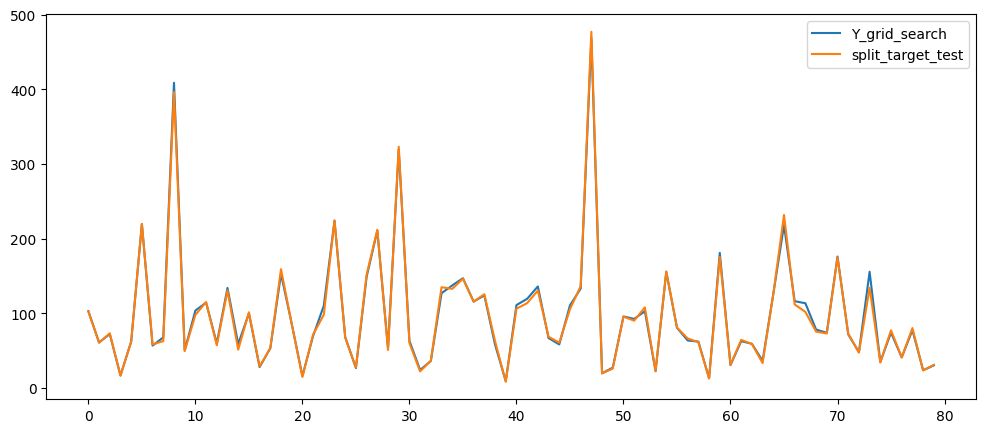

In [ ]:
"""# plot prediction
plt.figure(figsize=(12, 5))
plt.plot((Y_pred_cercle)[:80])
plt.plot((np.array(split_target_test_cercle)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

plt.figure(figsize=(12, 5))
plt.plot((Y_pred_cercle_creux)[:80])
plt.plot((np.array(split_target_test_cercle_creux)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

plt.figure(figsize=(12, 5))
plt.plot((Y_pred_rectangle_creux)[:80])
plt.plot((np.array(split_target_test_rectangle_creux)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()"""

# plot prediction for rectangle creux
Y_pred_rectangle_creux = grid.predict(split_test_rectangle_creux)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred_rectangle_creux)[:80])
plt.plot((np.array(split_target_test_rectangle_creux)[:80]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

In [ ]:
# save all 4 models with pickle
with open('model_cercle.pkl', 'wb') as f:
    pickle.dump(poly_reg_cercle, f)
with open('model_cercle_creux.pkl', 'wb') as f:
    pickle.dump(poly_reg_cercle_creux, f)
with open('model_rectangle_creux.pkl', 'wb') as f:
    pickle.dump(poly_reg_rectangle_creux, f)
with open('model_rectangle.pkl', 'wb') as f:
    pickle.dump(poly_reg_rectangle, f)



# Apprentissage avec variation Elements finnis

In [5]:
def split_and_drop(data,nbr_sample,input_features,droped_features,population_train):

    data  = pd.concat(data, axis=1)
    data = data.sample(n=nbr_sample)
    data = data.drop(droped_features, axis=1)
    split_train,split_test = train_test_split(data, train_size=population_train)
    print(split_train)
    split_target_train = split_train.drop(columns=input_features)
    split_target_test = split_test.drop(columns=input_features)
    split_train = split_train.drop(columns="freq1")
    split_test = split_test.drop(columns="freq1")
    return split_train,split_test,split_target_train,split_target_test



In [14]:
freq_cercle = pd.read_csv(open("gen_data/var_elts/test_Cercle_var.csv", "r"),delimiter=",")
input_cercle = pd.read_csv(open("gen_data/var_elts/dict_Cercle_var.csv", "r"),delimiter=",")

freq_cercle_creux = pd.read_csv(open("gen_data/var_elts/test_Cercle_Creux_var.csv", "r"),delimiter=",")
input_cercle_creux = pd.read_csv(open("gen_data/var_elts/dict_Cercle_Creux_var.csv", "r"),delimiter=",")

freq_rectangle_creux = pd.read_csv(open("gen_data/var_elts/test_Rectangle_Creux.csv", "r"),delimiter=",")
input_rectangle_creux = pd.read_csv(open("gen_data/var_elts/dict_Rectangle_Creux.csv", "r"),delimiter=",")

freq_rectangle = pd.read_csv(open("gen_data/var_elts/test_Rectangle_var.csv", "r"),delimiter=",")
input_rectangle = pd.read_csv(open("gen_data/var_elts/dict_Rectangle_var.csv", "r"),delimiter=",")

freq_100el = pd.read_csv(open("test100.csv","r"),delimiter=",")
input_100el = pd.read_csv(open("dict100.csv","r"),delimiter=",")



data_rectangle_creux = [input_rectangle_creux, freq_rectangle_creux]


data_rectangle = [input_rectangle, freq_rectangle]
data_rectangle = pd.concat(data_rectangle, axis=1)
data_rectangle = data_rectangle.sample(n=15000)


to_drop = ['S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat']
to_drop_sans_mat = ['S', 'I', 'L', 'E','freq2','freq3','freq4','freq5','freq6','freq7','freq8']
freq1 = frequences


data_cercle = [input_cercle, freq_cercle]
entrees_cercle = ['NbElts','L_tot','rho', 'r']
split_train_cercle,split_test_cercle,split_target_train_cercle,split_target_test_cercle = split_and_drop(data_cercle,15000,entrees_cercle,to_drop,0.7)


data_cercle_creux = [input_cercle_creux, freq_cercle_creux]
entrees_cercle_creux = ['NbElts','L_tot','rho', 'r_ext','r_int']
split_train_cercle_creux,split_test_cercle_creux,split_target_train_cercle_creux,split_target_test_cercle_creux = split_and_drop(data_cercle_creux,20000,entrees_cercle_creux,to_drop,0.7)

data_rectangle_creux = [input_rectangle_creux, freq_rectangle_creux]
entrees_rectangle_creux = ['L_tot','rho', 'h_ext','b_ext','h_int','b_int']
split_train_rectangle_creux,split_test_rectangle_creux,split_target_train_rectangle_creux,split_target_test_rectangle_creux = split_and_drop(data_rectangle_creux,50000,entrees_rectangle_creux,to_drop,0.7)

data_rectangle = [input_rectangle, freq_rectangle]

entrees_rectangle = ['L_tot','rho', 'h','b']
split_train_rectangle,split_test_rectangle,split_target_train_rectangle,split_target_test_rectangle = split_and_drop(data_rectangle,5000,entrees_rectangle,to_drop,0.99)
print(split_train_rectangle)

data_100el = [freq_100el,input_100el]
entrees_100el = ['L_tot','rho', 'h','b']
split_train_100el,split_test_100el,split_target_train_100el,split_target_test_100el = split_and_drop(data_100el,5000,entrees_100el,to_drop,0.99)
# ploat score according number of data
    





       NbElts     L_tot   rho         r       freq1
318        15  0.427343  7850  0.007776   61.620701
1999       30  0.469729  8900  0.014154   66.996399
2065       44  0.114047  2500  0.007371  832.973572
6872       25  0.780399  4510  0.073532  169.843094
5219       35  0.156626  2500  0.011203  671.283325
...       ...       ...   ...       ...         ...
7770       50  0.773257  7850  0.020021   48.455799
12554      45  0.435131  2700  0.029613  221.223999
21631      34  0.366035  2700  0.029704  313.584686
3589       43  0.404689  4510  0.029523  253.586395
143        29  0.114422  8900  0.003443  274.627686

[10500 rows x 5 columns]
       NbElts     L_tot   rho     r_ext     r_int       freq1
9037       16  0.334190  7850  0.024850  0.018380  400.511414
16686      33  0.195835  4510  0.006134  0.003522  259.445099
19294      39  0.428532  2400  0.025406  0.004242  138.749695
4641       12  0.292072  4510  0.023363  0.021101  519.138184
18595      24  0.212653  2400  0.020876 

In [15]:
"""for i in range (8,20):
    poly_reg_cercle_var = PolynomialRegression(i)
    poly_reg_cercle_var.fit(split_train_cercle, split_target_train_cercle)
    print(poly_reg_cercle_var.score(split_test_cercle, split_target_test_cercle))
"""
"""rf_reg_cercle_var = RandomForestRegressor(n_estimators=150, max_depth=13, random_state=0)
rf_reg_cercle_var.fit(split_train_cercle, split_target_train_cercle)
print("cercle : ",rf_reg_cercle_var.score(split_test_cercle, split_target_test_cercle))

rf_reg_cercle_creux_var = RandomForestRegressor(n_estimators=150, max_depth=13, random_state=0)
rf_reg_cercle_creux_var.fit(split_train_cercle_creux, split_target_train_cercle_creux)
print("cercle creux : ",rf_reg_cercle_creux_var.score(split_test_cercle_creux, split_target_test_cercle_creux))

rf_reg_rectangle_creux_var = RandomForestRegressor(n_estimators=150, max_depth=13, random_state=0)
rf_reg_rectangle_creux_var.fit(split_train_rectangle_creux, split_target_train_rectangle_creux)
print("rectangle creux : ",rf_reg_rectangle_creux_var.score(split_test_rectangle_creux, split_target_test_rectangle_creux))"""

rf_reg_rectangle_var = RandomForestRegressor(n_estimators=150, max_depth=13, random_state=0)
rf_reg_rectangle_var.fit(split_train_rectangle, split_target_train_rectangle)
print("rectangle : ",rf_reg_rectangle_var.score(split_test_rectangle, split_target_test_rectangle))

rf_reg_100el_var = RandomForestRegressor(n_estimators=150, max_depth=13, random_state=0)
rf_reg_100el_var.fit(split_train_100el, split_target_train_100el)
print("100el : ",rf_reg_100el_var.score(split_test_100el, split_target_test_100el))



rectangle :  0.9016852481361992
100el :  0.9946570978075422


In [16]:
import time
start = time.time()
Y_pred_100el = rf_reg_100el_var.predict(split_train_100el)
end = time.time()
print("temps de calcul 100elc : ",end-start)
start = time.time()
Y_pred_rectangle = rf_reg_rectangle_var.predict(split_train_rectangle)
end = time.time()
print("temps de calcul rectangle variation : ",end-start)

temps de calcul 100elc :  0.24346137046813965
temps de calcul rectangle variation :  0.2791440486907959


In [83]:
print("oskour")
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 1000]
}
grid_rf_rectangle = GridSearchCV(rf_reg_rectangle_var, param_grid=param_grid, cv=5,n_jobs=-1,verbose=2)
grid_rf_rectangle.fit(split_train_rectangle, split_target_train_rectangle)
print("OEEEEEEEEEEEEEEEE")
print("best params : ",grid_rf_rectangle.best_params_)
print("best score : ",grid_rf_rectangle.best_score_)

oskour
Fitting 5 folds for each of 80 candidates, totalling 400 fits
OEEEEEEEEEEEEEEEE
best params :  {'bootstrap': True, 'max_depth': 20, 'max_features': 2, 'n_estimators': 1000}
best score :  0.9682891964513127


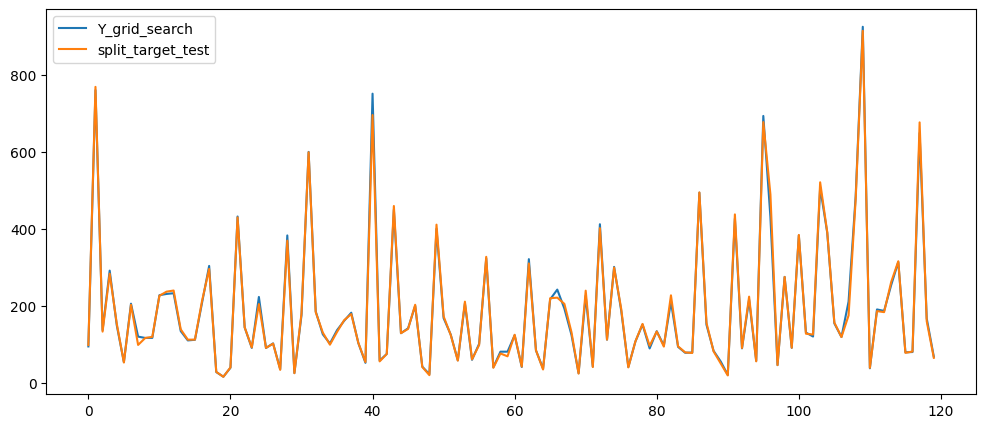

In [78]:
# plot prediction
Y_pred_cercle_var = rf_reg_cercle_var.predict(split_test_cercle)
plt.figure(figsize=(12, 5))
plt.plot((Y_pred_cercle_var)[:120])
plt.plot((np.array(split_target_test_cercle)[:120]))

plt.legend(
    ['Y_grid_search', 'split_target_test'])
plt.show()

# visualize tree




In [22]:
freq_trellis = pd.read_csv(open("test_treillis_10elts.csv", "r"),delimiter=",")
input_treillis = pd.read_csv(open("dict_treillis_10elts.csv", "r"),delimiter=",")

data_treillis = [freq_trellis,input_treillis]
# NbElts,L_tot,rho,h,b,S,I,L,E,Mat,nu
entrees_treillis = ['L_tot','rho', 'h','b']
to_drop = ['NbElts','S', 'I', 'L', 'E','nu','freq2','freq3','freq4','freq5','freq6','freq7','freq8','Mat']
split_train_treillis,split_test_treillis,split_target_train_treillis,split_target_test_treillis = split_and_drop(data_treillis,2500,entrees_treillis,to_drop,0.7)

rf_reg_treillis_var = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=0)
my_grid = {'n_estimators': [100,150,200,250,300,400], 'max_depth': [5, 10, 15, 20, 25],
}
grid_rf_treillis = GridSearchCV(rf_reg_treillis_var, param_grid=my_grid, cv=5,n_jobs=-1,verbose=2)
grid_rf_treillis.fit(split_train_treillis, split_target_train_treillis)

print("best params : ",grid_rf_treillis.best_params_)
print("best score : ",grid_rf_treillis.best_score_)
print("score : ",grid_rf_treillis.score(split_test_treillis, split_target_test_treillis))
rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)
print("treillis : ",rf_reg_treillis_var.score(split_test_treillis, split_target_test_treillis))






           freq1     L_tot   rho         h         b
1185   30.881500  0.772376  2400  0.071497  0.032257
691   112.692902  0.311137  7800  0.013238  0.022037
1388   38.389900  0.444274  2500  0.008929  0.012191
2058   76.292801  0.773667  2500  0.053809  0.064962
1904   14.386500  0.858736  7850  0.055454  0.012697
...          ...       ...   ...       ...       ...
938    81.775597  0.382178  2500  0.024496  0.014074
1189   77.154800  0.512260  2500  0.023857  0.037104
1084   38.196800  0.596818  7850  0.050767  0.016284
1816   53.346699  0.867841  7850  0.053901  0.048088
348    27.765800  0.491071  4510  0.008244  0.021107

[1750 rows x 5 columns]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best params :  {'max_depth': 25, 'n_estimators': 100}
best score :  0.9318903473958297
score :  0.9470720072901618


C:\Users\enzoh\AppData\Local\Temp\ipykernel_17156\536188084.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_treillis_var.fit(split_train_treillis, split_target_train_treillis)


treillis :  0.9452087103533288
